In [1]:
from __future__ import print_function
import numpy as np
import os
import sys
from IPython.display import display, Image
from scipy import ndimage
from six.moves import cPickle as pickle

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

In [ ]:
# Training Dataset Builder: Get the pixels, prepross them store the dataset using pickle files into the disk

image_size = 28

def image_pixel_standarize(image_pixel_val):
    return(image_pixel_val - 255.0/2)/255.0
    

def bld_pixels_arr(folder_name, min_no_of_image, max_no_of_image=None):
    # Build the pickle file for one Alphabet Image
    if max_no_of_image:
        image_filenames = os.listdir(folder_name)[0:max_no_of_image]
    else:
        image_filenames = os.listdir(folder_name)

    # Assign a numpy multudimensional array to store the image pixels, the image is 28*28 pixels
    dataset = np.ndarray(shape=(len(image_filenames), 
                                image_size, 
                                image_size
                               ),
                         dtype=np.float32)
    print (dataset.shape)
    for num_images, image in enumerate(image_filenames):
#         print (num_images)
        image_file_dir = os.path.join(folder_name, image)
        try:
            image_pixels = ndimage.imread(image_file_dir).astype(float)
            image_standarized = image_pixel_standarize(image_pixels)

            iaf image_standarized.shape != (image_size, image_size):
                raise Exception('Unexpected image shape: %s' % str(image_standarized.shape))
            dataset[num_images, :, :] = image_standarized
        except IOError as e:
            print('Could not read:', image, ':', e, '- hence skipping.')
        
    dataset = dataset[0:num_images+1, :, :]  # Will combine all the image pixels for 1 type Example All the 'a'
#     print (dataset.shape)
#     print (dataset)
    if num_images < min_no_of_image:
        raise Exception('Many fewer images than expected: %d < %d' %(num_images, min_no_of_image))

    print('Complete Training/Crossvalidation dataset :', dataset.shape)
    print('Mean:', np.mean(dataset))
    print('Standard deviation:', np.std(dataset))    
    return dataset


        
def crt_dataset(data_folders, dataset_type, min_no_of_image, max_no_of_image=None, force=None):    
    dataset_dir_n_names = []
    # One folder would comtain all the images pertaining to one particular alphabet.
    for folder in data_folders:  # [0:2]  
        print ('')
        print ('Running for alphabet',os.path.basename(folder))
        set_filename = dataset_type + os.path.basename(folder) + '.pickle'
#         print (set_filename)
        dataset_dir_n_names.append(set_filename)
#         Ckech if the pickle file already exists, if not then we create one for each
        if os.path.exists(set_filename) and not force:
            print ('Yes+Yes--The pickle file exists')
        else:
            dataset = bld_pixels_arr(folder, min_no_of_image=min_no_of_image, max_no_of_image=max_no_of_image)
            try:
                with open(set_filename, 'wb') as f:
                    pickle.dump(dataset, f, pickle.HIGHEST_PROTOCOL)
            except Exception as e:
                print('Unable to save data to', set_filename, ':', e)
    return dataset_dir_n_names
                
# Reading the tar file from the directory
dir_nMNIST_train = "/Users/sam/All-Program/App-DataSet/Deep-Neural-Nets/MNIST_ImageClassification/notMNIST_large"
dir_nMNIST_test = "/Users/sam/All-Program/App-DataSet/Deep-Neural-Nets/MNIST_ImageClassification/notMNIST_small"

# Get all the subdirectories path inside the folders that has the images
data_folders_train = [os.path.join(dir_nMNIST_train, d) for d in sorted(os.listdir(dir_nMNIST_train)) if os.path.isdir(os.path.join(dir_nMNIST_train, d))]
data_folders_test = [os.path.join(dir_nMNIST_test, d) for d in sorted(os.listdir(dir_nMNIST_test)) if os.path.isdir(os.path.join(dir_nMNIST_test, d))]

training_dataset_dir = "/Users/sam/All-Program/App-DataSet/Deep-Neural-Nets/MNIST_ImageClassification/Datapreparation/training_dataset/"
test_dataset_dir = "/Users/sam/All-Program/App-DataSet/Deep-Neural-Nets/MNIST_ImageClassification/Datapreparation/test_dataset/"

training_data_names_n_dir = crt_dataset(data_folders=data_folders_train, 
                            dataset_type=training_dataset_dir, 
                            min_no_of_image=45000, 
                            max_no_of_image=None, 
                            force=None)
test_data_names_n_dir = crt_dataset(data_folders=data_folders_test, 
                            dataset_type=test_dataset_dir, 
                            min_no_of_image=1800, 
                            max_no_of_image=None, 
                            force=None)

In [ ]:
# Plot a sample set of the figures to check if the images are okay and not completly mixed up due to preprocessing
from matplotlib import pyplot as plt

# Lets sample data from Training dataset for each label

for dirtr in training_data_names_n_dir:
    print (os.path.basename(dirtr))
    alphabet_flname = os.path.basename(dirtr)
    if alphabet_flname == 'A.pickle':
        A = pickle.load(open(dirtr, "rb" ))[0:5,:,:]
    elif alphabet_flname == 'B.pickle':
        B = pickle.load(open(dirtr, "rb" ))[0:5,:,:]
    elif alphabet_flname == 'C.pickle':
        C = pickle.load(open(dirtr, "rb" ))[0:5,:,:]
    elif alphabet_flname == 'D.pickle':
        D = pickle.load(open(dirtr, "rb" ))[0:5,:,:]
    elif alphabet_flname == 'E.pickle':
        E = pickle.load(open(dirtr, "rb" ))[0:5,:,:]
    elif alphabet_flname == 'F.pickle':
        F = pickle.load(open(dirtr, "rb" ))[0:5,:,:]
    elif alphabet_flname == 'G.pickle':
        G = pickle.load(open(dirtr, "rb" ))[0:5,:,:]
    elif alphabet_flname == 'H.pickle':
        H = pickle.load(open(dirtr, "rb" ))[0:5,:,:]
    elif alphabet_flname == 'I.pickle':
        I = pickle.load(open(dirtr, "rb" ))[0:5,:,:]
    elif alphabet_flname == 'J.pickle':
        J = pickle.load(open(dirtr, "rb" ))[0:5,:,:]

# print (J)

fig, axs = plt.subplots(9,5, figsize=(20, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

for x, data in zip(["0","1","2","3","4","5","6","7","8"],[A,B,C,D,E,F,G,H,I,J]):
    for y, img_pixels in enumerate(data):
        axs[x][y].imshow(img_pixels)

In [ ]:
# Building the training, crossvalidation and test dataset.

def initialize_arrays(no_of_images, img_size):
    dataset = np.ndarray((no_of_images, img_size, img_size), dtype=np.float32)
    labels = np.ndarray(no_of_images, dtype=np.int32)
    return dataset, labels


    
# In the below chunk of code we create a balanced cross validation dataset for each class 'labels' (A,B,C,D,E,F,G,H)
# Balance in dataset is achieved by (start_v,start_t) and (end_v,end_t). Labels are a collection of 0:9 corresponding
# to each alphabet.
# For example if we select crossvalidation size cross_valid_size=40 and one image has say 1000 training samples. 
# The Below method will randomly select 40/10 = 4 dataset(images)
# For one alphabet the below method will perform below:
#      1. Start the for loop for each labels: A,B,C,D,E,F,G,H,I,J
#      2. Randomize the dataset for the current label ex: A.
#      3. select top 4 dataset (40/10) from the randomized dataset of size 1000 and store it into the crossvalid_dataset
#      4. create a label array with [0,0,0,0] corresponding to crossvalidation dataset, here 0 represents label "A"
#      5. select top 4-8 dataset out of the randomized dataset of size 1000 and store it into the training_dataset
#      6. create a label array with [0,0,0,0] corresponding to training dataset, here 0 represents label "A"
# NOTE: the crossvalid_dataset will have a shape of [40,horizontal_pixel_size_of_image, vertical_pixel_of_image].
#       and so will the training_dataset depending on its training_size
def train_valid_test_builder(training_data_names_n_dir, training_size, crossvalid_size=0):
    no_of_labels = len(training_data_names_n_dir)
    training_dataset, training_labels = initialize_arrays(training_size, image_size)
    if crossvalid_size!=0:
        crossvalid_dataset, crossvalid_labels = initialize_arrays(crossvalid_size, image_size)
    else:
        crossvalid_dataset, crossvalid_labels = None, None
#     print (valid_dataset.shape)
#     print (valid_labels.shape)
#     print (valid_dataset)

    training_size_per_class = training_size // no_of_labels
    crossvalid_size_per_class = crossvalid_size // no_of_labels
    print ('training/teting size per class = ',training_size_per_class)
    print ('crossvalid size per class = ', crossvalid_size_per_class)
    
    start_v, start_t = 0, 0
    end_v, end_t = crossvalid_size_per_class, training_size_per_class
    end_vt = crossvalid_size_per_class+training_size_per_class

    for label, pickle_files in enumerate(training_data_names_n_dir):      
#         print ('Running for alphabet: ', os.path.basename(pickle_files))
        try:
            with open(pickle_files, 'rb') as f:
                letter_data = pickle.load(f)
                np.random.shuffle(letter_data)          # This will suffle the data which will give the top elements as random
                if crossvalid_dataset is not None:
                    crossvalid_for_letter = letter_data[0:crossvalid_size_per_class, :, :]
                    crossvalid_dataset[start_v:end_v, :, :] = crossvalid_for_letter
                    crossvalid_labels[start_v:end_v] = label
                    start_v += crossvalid_size_per_class
                    end_v += crossvalid_size_per_class

                training_for_letter = letter_data[crossvalid_size_per_class:end_vt, :, :]
                training_dataset[start_t:end_t, :, :] = training_for_letter
                training_labels[start_t:end_t] = label
                start_t += training_size_per_class
                end_t += training_size_per_class
        except Exception as e:
            print('Unable to process data from', pickle_files, ':', e)
            raise
    return crossvalid_dataset, crossvalid_labels, training_dataset, training_labels


training_size = 200000      # Total Train size including all different labels
crossvalid_size = 10000     # Total Crossvalid size including all different labels
test_size = 10000           # Total Test size including all different labels

print ('Running for training and crossvalidation Dataset')
crossvalid_dataset, crossvalid_labels, training_dataset, training_labels = train_valid_test_builder(training_data_names_n_dir, training_size, crossvalid_size)
print ('')
print ('Running for test Dataset')
_, _, test_dataset, test_labels = train_valid_test_builder(test_data_names_n_dir, test_size)

print ('')
print('Training:', training_dataset.shape, training_labels.shape)
print('Cross Validation:', crossvalid_dataset.shape, crossvalid_labels.shape)
print('Testing:', test_dataset.shape, test_labels.shape)

array([0, 0, 0, ..., 9, 9, 9], dtype=int32)

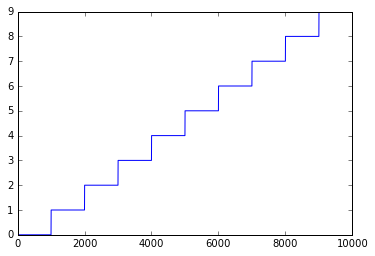

In [5]:
# Check whether the dataset is balanced throughtout the classes
display(test_labels)
plt.plot(test_labels);
# The step wise ladder shows that for any particular class the difference in dataset between its predecessor and 
# successor is the same. Hence we say that the data set is balanced

In [6]:
# Now we suffle the training, crossvalidation and test data, and we maintain the respectiveness of the data w.r.t its labels
def randomize(dataset, labels):
    permutation = np.random.permutation(labels.shape[0])
    print ('The permutation array is: ', permutation)
    shuffled_dataset = dataset[permutation,:,:]
    shuffled_labels = labels[permutation]
    return shuffled_dataset, shuffled_labels

training_dataset, training_labels = randomize(training_dataset, training_labels)
crossvalid_dataset, crossvalid_labels = randomize(crossvalid_dataset, crossvalid_labels)
test_dataset, test_labels = randomize(test_dataset, test_labels)

print('Training:', training_dataset.shape, training_labels.shape)
print('Cross Validation:', crossvalid_dataset.shape, crossvalid_labels.shape)
print('Testing:', test_dataset.shape, test_labels.shape)

The permutation array is:  [150084  35687 103628 ..., 184852  10216 158860]
The permutation array is:  [6489 3329 4324 ..., 7701 3465 5712]
The permutation array is:  [5522 9437 3956 ..., 3517 7879 2279]
Training: (200000, 28, 28) (200000,)
Cross Validation: (10000, 28, 28) (10000,)
Testing: (10000, 28, 28) (10000,)


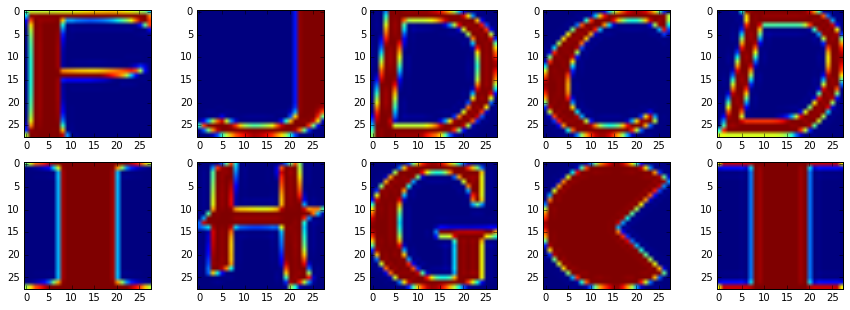

In [17]:
# The below code will ckeck if the test data is fine even after the suffling or the image look recognizable.

fig2, axs2 = plt.subplots(2,5, figsize=(15, 5), facecolor='w', edgecolor='k')

axs2 = axs2.ravel()

for x, data in enumerate(test_dataset):
    if x < 10:
        axs2[x].imshow(data)
    else:
        break

In [8]:
# Now we simply store the training, crossvalid and test dataset into the disk

complete_dataset_path = '/Users/sam/All-Program/App-DataSet/Deep-Neural-Nets/MNIST_ImageClassification/Datapreparation/dataset_complete.p'

try:
    f = open(complete_dataset_path, 'wb')
    dataset_complete = {
        'training_dataset': training_dataset,
        'training_labels': training_labels,
        'crossvalid_dataset': crossvalid_dataset,
        'crossvalid_labels': crossvalid_labels,
        'test_dataset': test_dataset,
        'test_labels': test_labels,
    }
    pickle.dump(dataset_complete, f, pickle.HIGHEST_PROTOCOL)
    f.close()
except Exception as e:
    print('Unable to save data to', complete_dataset_path, ':', e)
    raise

    
statinfo = os.stat(complete_dataset_path)
print('Compressed pickle size:', statinfo.st_size)

Compressed pickle size: 690800519
